# IMDB Movie Analysis by Sagir Mehmood

## Project Description:
This dataset having various columns of different IMDB data. I have to use my knowledge of statistics and use different formulas in excel and draw necessary conclusions about the data.


## Approach:
I analyzed it in the manner described below: 
- Data cleaning 
- EDA 
- Analysis and conclusion



## Tech Used: 
Here I sought assistance from Python Jupyter Notebook.

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Adjust Jupyter view
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

In [4]:
raw_data = pd.read_csv('IMDB_Movies.csv')

In [5]:
raw_data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [6]:
raw_data.shape

(5043, 28)

In [7]:
data=raw_data.copy()

## A. <u> `Cleaning the data: `

This is one of the most important step to perform before moving forward with the analysis. Use your knowledge learned till now to do this. (Dropping columns, removing null values, etc.)


My task: Clean the data

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

#### 1. Dropping unnecessary columns (Not needed for this project): 



 'color','director_facebook_likes', 'actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes',
'actor_2_name', 'cast_total_facebook_likes', 'actor_3_name', 'duration', 'facenumber_in_poster', 'content_rating', 'country', 
'movie_imdb_link', 'aspect_ratio', 'plot_keywords'

In [9]:
un = ['color','director_facebook_likes','actor_1_facebook_likes','actor_2_facebook_likes','actor_3_facebook_likes',
      'actor_2_name','cast_total_facebook_likes','actor_3_name','duration','facenumber_in_poster','content_rating',
      'country','movie_imdb_link','aspect_ratio','plot_keywords']

In [10]:
len(un)

15

In [11]:
data.shape

(5043, 28)

In [12]:
data=data.drop(un,axis=1)

In [13]:
data.shape

(5043, 13)

In [14]:
data.head()

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes
0,James Cameron,723.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054,English,237000000.0,2009.0,7.9,33000
1,Gore Verbinski,302.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238,English,300000000.0,2007.0,7.1,0
2,Sam Mendes,602.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,994,English,245000000.0,2015.0,6.8,85000
3,Christopher Nolan,813.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701,English,250000000.0,2012.0,8.5,164000
4,Doug Walker,NaN,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,,NaN,NaN,NaN,7.1,0


#### 2.Removing the duplicate movie names, which are entered more than once.

In [15]:
mc=data['movie_title'].value_counts()

In [16]:
duplicates = mc[mc.values>1]
duplicates

Ben-Hur                                       3
Home                                          3
Pan                                           3
King Kong                                     3
Halloween                                     3
The Fast and the Furious                      3
Victor Frankenstein                           3
The Karate Kid                                2
Halloween II                                  2
Aloha                                         2
The Last House on the Left                    2
The Fog                                       2
Snakes on a Plane                             2
The Possession                                2
Side Effects                                  2
Planet of the Apes                            2
Mercury Rising                                2
Casino Royale                                 2
The Texas Chain Saw Massacre                  2
Lolita                                        2
Hero                                    

In [17]:
len(duplicates)

119

In [18]:
sum(duplicates.values)

245

In [19]:
sum(duplicates.values) - len(duplicates)

126

- There are 119 movie name which were entered more than once.

In [20]:
data.shape

(5043, 13)

In [21]:
data.drop_duplicates(subset ="movie_title", keep ='first', inplace = True)

In [22]:
data.shape

(4917, 13)

In [23]:
5043-126

4917

#### 3. Checking for null values:

In [24]:
data.isnull().sum()

director_name             102
num_critic_for_reviews     49
gross                     863
genres                      0
actor_1_name                7
movie_title                 0
num_voted_users             0
num_user_for_reviews       20
language                   12
budget                    484
title_year                106
imdb_score                  0
movie_facebook_likes        0
dtype: int64

In [25]:
round(data.isnull().sum()/len(data)*100,2)

director_name              2.07
num_critic_for_reviews     1.00
gross                     17.55
genres                     0.00
actor_1_name               0.14
movie_title                0.00
num_voted_users            0.00
num_user_for_reviews       0.41
language                   0.24
budget                     9.84
title_year                 2.16
imdb_score                 0.00
movie_facebook_likes       0.00
dtype: float64

- The percentage of Null values in the "gross" and "budget" columns in this table is high (more than 5%). Here I shall drop all the null rows in these two columns. Left is insignificant.

In [26]:
data= data[~np.isnan(data['gross'])]
data= data[~np.isnan(data['budget'])]

In [27]:
round(data.isnull().sum()/len(data)*100,2)

director_name             0.00
num_critic_for_reviews    0.03
gross                     0.00
genres                    0.00
actor_1_name              0.08
movie_title               0.00
num_voted_users           0.00
num_user_for_reviews      0.00
language                  0.08
budget                    0.00
title_year                0.00
imdb_score                0.00
movie_facebook_likes      0.00
dtype: float64

#### 4. Data formating:

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3789 entries, 0 to 5042
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   director_name           3789 non-null   object 
 1   num_critic_for_reviews  3788 non-null   float64
 2   gross                   3789 non-null   float64
 3   genres                  3789 non-null   object 
 4   actor_1_name            3786 non-null   object 
 5   movie_title             3789 non-null   object 
 6   num_voted_users         3789 non-null   int64  
 7   num_user_for_reviews    3789 non-null   object 
 8   language                3786 non-null   object 
 9   budget                  3789 non-null   float64
 10  title_year              3789 non-null   float64
 11  imdb_score              3789 non-null   float64
 12  movie_facebook_likes    3789 non-null   int64  
dtypes: float64(5), int64(2), object(6)
memory usage: 414.4+ KB


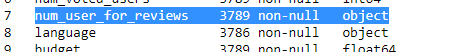

- Converting num_user_for_reviews from object type float type

In [29]:
data['num_user_for_reviews'] = data['num_user_for_reviews'].astype(float)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3789 entries, 0 to 5042
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   director_name           3789 non-null   object 
 1   num_critic_for_reviews  3788 non-null   float64
 2   gross                   3789 non-null   float64
 3   genres                  3789 non-null   object 
 4   actor_1_name            3786 non-null   object 
 5   movie_title             3789 non-null   object 
 6   num_voted_users         3789 non-null   int64  
 7   num_user_for_reviews    3789 non-null   float64
 8   language                3786 non-null   object 
 9   budget                  3789 non-null   float64
 10  title_year              3789 non-null   float64
 11  imdb_score              3789 non-null   float64
 12  movie_facebook_likes    3789 non-null   int64  
dtypes: float64(6), int64(2), object(5)
memory usage: 414.4+ KB


## B. <u> `Movies with highest profit: `

    Create a new column called profit which contains the difference of the two columns: gross and budget. Sort the column using the profit column as reference. Plot profit (y-axis) vs budget (x- axis) and observe the outliers using the appropriate chart type.

My task: Find IMDB Top 250

In [31]:
data['profit'] = data['gross']-data['budget']

In [32]:
data.sort_values(by='profit', ascending=False)

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit
0,James Cameron,723.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054.0,English,2.370000e+08,2009.0,7.9,33000,5.235058e+08
29,Colin Trevorrow,644.0,652177271.0,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,1290.0,English,1.500000e+08,2015.0,7.0,150000,5.021773e+08
26,James Cameron,315.0,658672302.0,Drama|Romance,Leonardo DiCaprio,Titanic,793059,2528.0,English,2.000000e+08,1997.0,7.7,26000,4.586723e+08
3024,George Lucas,282.0,460935665.0,Action|Adventure|Fantasy|Sci-Fi,Harrison Ford,Star Wars: Episode IV - A New Hope,911097,1470.0,English,1.100000e+07,1977.0,8.7,33000,4.499357e+08
3080,Steven Spielberg,215.0,434949459.0,Family|Sci-Fi,Henry Thomas,E.T. the Extra-Terrestrial,281842,515.0,English,1.050000e+07,1982.0,7.9,34000,4.244495e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3423,Katsuhiro Ôtomo,150.0,439162.0,Action|Animation|Sci-Fi,Mitsuo Iwata,Akira,106160,430.0,Japanese,1.100000e+09,1988.0,8.1,0,-1.099561e+09
2334,Katsuhiro Ôtomo,105.0,410388.0,Action|Adventure|Animation|Family|Sci-Fi|Thriller,William Hootkins,Steamboy,13727,79.0,Japanese,2.127520e+09,2004.0,6.9,973,-2.127110e+09
2323,Hayao Miyazaki,174.0,2298191.0,Adventure|Animation|Fantasy,Minnie Driver,Princess Mononoke,221552,570.0,Japanese,2.400000e+09,1997.0,8.4,11000,-2.397702e+09
3005,Lajos Koltai,73.0,195888.0,Drama|Romance|War,Marcell Nagy,Fateless,5603,45.0,Hungarian,2.500000e+09,2005.0,7.1,607,-2.499804e+09


In [33]:
top10 = data.sort_values(by='profit', ascending=False)[['movie_title','director_name','profit']].head(10)
top10

,movie_title,director_name,profit
0,Avatar,James Cameron,523505847.0
29,Jurassic World,Colin Trevorrow,502177271.0
26,Titanic,James Cameron,458672302.0
3024,Star Wars: Episode IV - A New Hope,George Lucas,449935665.0
3080,E.T. the Extra-Terrestrial,Steven Spielberg,424449459.0
17,The Avengers,Joss Whedon,403279547.0
509,The Lion King,Roger Allers,377783777.0
240,Star Wars: Episode I - The Phantom Menace,George Lucas,359544677.0
66,The Dark Knight,Christopher Nolan,348316061.0
439,The Hunger Games,Gary Ross,329999255.0


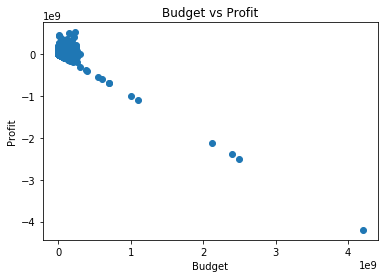

In [34]:
import matplotlib.pyplot as plt
y=data['profit']
x=data['budget']
plt.scatter(x,y)
plt.xlabel('Budget')
plt.ylabel('Profit')
plt.title('Budget vs Profit')
plt.show()

## C. <u> `Top 250 data with the highest IMDb Rating for all of these data, the num_voted_users is greater than 25,000:`
    
Create a new column IMDb_Top_250 and store the top 250 data with the highest IMDb Rating (corresponding to the column: imdb_score). Also make sure that for all of these data, the num_voted_users is greater than 25,000. Also add a Rank column containing the values 1 to 250 indicating the ranks of the corresponding films.

Extract all the data in the IMDb_Top_250 column which are not in the English language and store them in a new column named Top_Foreign_Lang_Film.

In [35]:
IMDB_Top_250 = data[data['num_voted_users']>25000][['movie_title','director_name','language','imdb_score']]
IMDB_Top_250 = IMDB_Top_250.sort_values(by='imdb_score',ascending=False)
IMDB_Top_250 = IMDB_Top_250.head(250)
IMDB_Top_250['Rank'] = range(1,251)
IMDB_Top_250

,movie_title,director_name,language,imdb_score,Rank
1937,The Shawshank Redemption,Frank Darabont,English,9.3,1
3466,The Godfather,Francis Ford Coppola,English,9.2,2
66,The Dark Knight,Christopher Nolan,English,9.0,3
2837,The Godfather: Part II,Francis Ford Coppola,English,9.0,4
3355,Pulp Fiction,Quentin Tarantino,English,8.9,5
1874,Schindler's List,Steven Spielberg,English,8.9,6
339,The Lord of the Rings: The Return of the King,Peter Jackson,English,8.9,7
4498,"The Good, the Bad and the Ugly",Sergio Leone,Italian,8.9,8
97,Inception,Christopher Nolan,English,8.8,9
2051,Star Wars: Episode V - The Empire Strikes Back,Irvin Kershner,English,8.8,10


In [36]:
Top_Foreign_Lang_Film = IMDB_Top_250[IMDB_Top_250['language'] != 'English'].sort_values(by='imdb_score',ascending=False)
Top_Foreign_Lang_Film

,movie_title,director_name,language,imdb_score,Rank
4498,"The Good, the Bad and the Ugly",Sergio Leone,Italian,8.9,8
4029,City of God,Fernando Meirelles,Portuguese,8.7,20
4747,Seven Samurai,Akira Kurosawa,Japanese,8.7,15
2373,Spirited Away,Hayao Miyazaki,Japanese,8.6,24
4259,The Lives of Others,Florian Henckel von Donnersmarck,German,8.5,35
4921,Children of Heaven,Majid Majidi,Persian,8.5,45
4105,Oldboy,Chan-wook Park,Korean,8.4,57
1298,Amélie,Jean-Pierre Jeunet,French,8.4,60
2323,Princess Mononoke,Hayao Miyazaki,Japanese,8.4,61
2970,Das Boot,Wolfgang Petersen,German,8.4,54


## D. <u>`Best Director (TOP-10):`
Find out the top 10 directors for whom the mean of imdb_score is the highest and store them in a new column top10director. In case of a tie in IMDb score between two directors, sort them alphabetically.

My task: Find the best directors

In [37]:
top10director = pd.DataFrame(data.groupby('director_name')['imdb_score'].mean())
top10director = top10director.sort_values(by=['imdb_score','director_name'],ascending=[False,True])
top10director = top10director.head(10)
top10director

,imdb_score
director_name,
Charles Chaplin,8.600000
Tony Kaye,8.600000
Alfred Hitchcock,8.500000
Damien Chazelle,8.500000
Majid Majidi,8.500000
Ron Fricke,8.500000
Sergio Leone,8.433333
Christopher Nolan,8.425000
Asghar Farhadi,8.400000


## E. <u>`Popular Genres: `
Perform this step using the knowledge gained while performing previous steps.


My task: Find popular genres

In [38]:
PopGenre = pd.DataFrame(data.groupby([ 'genres'])['imdb_score'].mean())
PopGenre = PopGenre.sort_values(by=['imdb_score','genres'],ascending=[False,True]).head(10)
PopGenre

,imdb_score
genres,
Adventure|Animation|Drama|Family|Musical,8.50
Crime|Drama|Fantasy|Mystery,8.50
Action|Adventure|Drama|Fantasy|War,8.40
Adventure|Animation|Fantasy,8.40
Adventure|Drama|Thriller|War,8.40
Adventure|Animation|Comedy|Drama|Family|Fantasy,8.30
Biography|Drama|History|Music,8.30
Documentary|Drama|Sport,8.30
Documentary|War,8.30


##### `Adventure|Animation|Drama|Family|Musical` is the most popular combo of genres 

## E. <u> `Charts: Create three new columns namely, Meryl_Streep, Leo_Caprio, and Brad_Pitt which contain the data in which the actors: 'Meryl Streep', 'Leonardo DiCaprio', and 'Brad Pitt' are the lead actors. Use only the actor_1_name column for extraction. Also, make sure that you use the names 'Meryl Streep', 'Leonardo DiCaprio', and 'Brad Pitt' for the said extraction.`

## <u> `Append the rows of all these columns and store them in a new column named Combined.`

## <u> `Group the combined column using the actor_1_name column.`

## <u> `Find the mean of the num_critic_for_reviews and num_users_for_review and identify the actors which have the highest mean.`

## <u> `Observe the change in number of voted users over decades using a bar chart. Create a column called decade which represents the decade to which every movie belongs to. For example, the title_year year 1923, 1925 should be stored as 1920s. Sort the column based on the column decade, group it by decade and find the sum of users voted in each decade. Store this in a new data frame called df_by_decade.`


## <u> `Your task: Find the critic-favorite and audience-favorite actors`

##### Lead:  Meryl Streepis

In [39]:
Meryl_Streep = data[data['actor_1_name']=='Meryl Streep'][['movie_title','actor_1_name','num_critic_for_reviews','num_user_for_reviews']]
Meryl_Streep

,movie_title,actor_1_name,num_critic_for_reviews,num_user_for_reviews
410,It's Complicated,Meryl Streep,187.0,214.0
1106,The River Wild,Meryl Streep,42.0,69.0
1204,Julie & Julia,Meryl Streep,252.0,277.0
1408,The Devil Wears Prada,Meryl Streep,208.0,631.0
1483,Lions for Lambs,Meryl Streep,227.0,298.0
1575,Out of Africa,Meryl Streep,66.0,200.0
1618,Hope Springs,Meryl Streep,234.0,178.0
1674,One True Thing,Meryl Streep,64.0,112.0
1925,The Hours,Meryl Streep,174.0,660.0
2781,The Iron Lady,Meryl Streep,331.0,350.0


##### Lead:  Leonardo DiCaprio 

In [40]:
Leo_Caprio =data[data['actor_1_name']=='Leonardo DiCaprio'][['movie_title','actor_1_name','num_critic_for_reviews','num_user_for_reviews']]
Leo_Caprio

,movie_title,actor_1_name,num_critic_for_reviews,num_user_for_reviews
26,Titanic,Leonardo DiCaprio,315.0,2528.0
50,The Great Gatsby,Leonardo DiCaprio,490.0,753.0
97,Inception,Leonardo DiCaprio,642.0,2803.0
179,The Revenant,Leonardo DiCaprio,556.0,1188.0
257,The Aviator,Leonardo DiCaprio,267.0,799.0
296,Django Unchained,Leonardo DiCaprio,765.0,1193.0
307,Blood Diamond,Leonardo DiCaprio,166.0,657.0
308,The Wolf of Wall Street,Leonardo DiCaprio,606.0,1138.0
326,Gangs of New York,Leonardo DiCaprio,233.0,1166.0
361,The Departed,Leonardo DiCaprio,352.0,2054.0


##### Lead: Brad Pitt

In [41]:
Brad_Pitt= data[data['actor_1_name']=='Brad Pitt'][['movie_title','actor_1_name','num_critic_for_reviews','num_user_for_reviews']]
Brad_Pitt

,movie_title,actor_1_name,num_critic_for_reviews,num_user_for_reviews
101,The Curious Case of Benjamin Button,Brad Pitt,362.0,822.0
147,Troy,Brad Pitt,220.0,1694.0
254,Ocean's Twelve,Brad Pitt,198.0,627.0
255,Mr. & Mrs. Smith,Brad Pitt,233.0,798.0
382,Spy Game,Brad Pitt,142.0,361.0
400,Ocean's Eleven,Brad Pitt,186.0,845.0
470,Fury,Brad Pitt,406.0,701.0
611,Seven Years in Tibet,Brad Pitt,76.0,119.0
683,Fight Club,Brad Pitt,315.0,2968.0
792,Sinbad: Legend of the Seven Seas,Brad Pitt,98.0,91.0


##### Combining these three dataframes in a new dataframe, named Combined 

In [42]:
Combined=pd.concat([Meryl_Streep,Leo_Caprio,Brad_Pitt])
Combined 

,movie_title,actor_1_name,num_critic_for_reviews,num_user_for_reviews
410,It's Complicated,Meryl Streep,187.0,214.0
1106,The River Wild,Meryl Streep,42.0,69.0
1204,Julie & Julia,Meryl Streep,252.0,277.0
1408,The Devil Wears Prada,Meryl Streep,208.0,631.0
1483,Lions for Lambs,Meryl Streep,227.0,298.0
1575,Out of Africa,Meryl Streep,66.0,200.0
1618,Hope Springs,Meryl Streep,234.0,178.0
1674,One True Thing,Meryl Streep,64.0,112.0
1925,The Hours,Meryl Streep,174.0,660.0
2781,The Iron Lady,Meryl Streep,331.0,350.0


#### <u>Finding the mean of critic reviews and audience reviews from the above table:

In [43]:
a = pd.DataFrame(Combined.groupby('actor_1_name')['num_critic_for_reviews'].mean())
a.sort_values(by='num_critic_for_reviews',ascending=False)

,num_critic_for_reviews
actor_1_name,
Leonardo DiCaprio,322.200000
Brad Pitt,245.000000
Meryl Streep,181.454545


In [44]:
b = pd.DataFrame(Combined.groupby('actor_1_name')['num_user_for_reviews'].mean())
b.sort_values(by='num_user_for_reviews',ascending=False)

,num_user_for_reviews
actor_1_name,
Leonardo DiCaprio,922.550000
Brad Pitt,742.352941
Meryl Streep,297.181818


#### <u>Finding the mean of critic reviews and audience reviews from overall data:  

In [45]:
e = pd.DataFrame(data.groupby('actor_1_name')['num_critic_for_reviews'].mean())
e.sort_values(by='num_critic_for_reviews',ascending=False).head(10)

,num_critic_for_reviews
actor_1_name,
Albert Finney,750.0
Phaldut Sharma,738.0
Peter Capaldi,654.0
Craig Stark,596.0
Bérénice Bejo,576.0
Suraj Sharma,552.0
Ellar Coltrane,548.0
Mike Howard,546.0
Lou Taylor Pucci,543.0


In [46]:
f = pd.DataFrame(data.groupby('actor_1_name')['num_user_for_reviews'].mean())
f.sort_values(by='num_user_for_reviews',ascending=False).head(10)

,num_user_for_reviews
actor_1_name,
Heather Donahue,3400.0
Christo Jivkov,2814.0
Steve Bastoni,2789.0
Phaldut Sharma,1885.0
Orlando Bloom,1842.0
Keir Dullea,1736.0
Chen Chang,1641.0
Nick Stahl,1562.0
Albert Finney,1498.0


#### <u>The sum of users voted in each decade:

- Decade= year- remainder(decade/10)
- Eg. Year= 2013
      So, Remainder(2013/10) = 3
      So, Decade = 2013-3 = 2010


In [47]:
data['decade']=data['title_year']-(data['title_year']%10)

In [48]:
df_by_decade = pd.DataFrame(data.groupby('decade')['num_voted_users'].sum())
df_by_decade.sort_values(by='num_voted_users',ascending=False)

,num_voted_users
decade,
2000.0,165976608
2010.0,116240252
1990.0,69635863
1980.0,19344369
1970.0,8269828
1960.0,2983442
1930.0,804839
1950.0,678336
1940.0,230838
